In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
from imagebind import data
import torch
from imagebind.models import imagebind_model
from imagebind.models.imagebind_model import ModalityType

device = "cuda:0" if torch.cuda.is_available() else "cpu"

# Instantiate model
model = imagebind_model.imagebind_huge(pretrained=True)
model.eval()
model.to(device)

/root/stable-diffusion-webui/venv/lib/python3.11/site-packages/torchvision/transforms/functional_tensor.py:5: UserWarning: The torchvision.transforms.functional_tensor module is deprecated in 0.15 and will be **removed in 0.17**. Please don't rely on it. You probably just need to use APIs in torchvision.transforms.functional or in torchvision.transforms.v2.functional.
  warnings.warn(
/root/stable-diffusion-webui/venv/lib/python3.11/site-packages/torchvision/transforms/_functional_video.py:6: UserWarning: The 'torchvision.transforms._functional_video' module is deprecated since 0.12 and will be removed in the future. Please use the 'torchvision.transforms.functional' module instead.
  warnings.warn(
/root/stable-diffusion-webui/venv/lib/python3.11/site-packages/torchvision/transforms/_transforms_video.py:22: UserWarning: The 'torchvision.transforms._transforms_video' module is deprecated since 0.12 and will be removed in the future. Please use the 'torchvision.transforms' module instea

100%|██████████| 4.47G/4.47G [00:39<00:00, 122MB/s]  


ImageBindModel(
  (modality_preprocessors): ModuleDict(
    (vision): RGBDTPreprocessor(
      (cls_token): tensor((1, 1, 1280), requires_grad=True)
      
      (rgbt_stem): PatchEmbedGeneric(
        (proj): Sequential(
          (0): PadIm2Video()
          (1): Conv3d(3, 1280, kernel_size=(2, 14, 14), stride=(2, 14, 14), bias=False)
        )
      )
      (pos_embedding_helper): SpatioTemporalPosEmbeddingHelper(
        (pos_embed): tensor((1, 257, 1280), requires_grad=True)
        
      )
    )
    (text): TextPreprocessor(
      (pos_embed): tensor((1, 77, 1024), requires_grad=True)
      (mask): tensor((77, 77), requires_grad=False)
      
      (token_embedding): Embedding(49408, 1024)
    )
    (audio): AudioPreprocessor(
      (cls_token): tensor((1, 1, 768), requires_grad=True)
      
      (rgbt_stem): PatchEmbedGeneric(
        (proj): Conv2d(1, 768, kernel_size=(16, 16), stride=(10, 10), bias=False)
        (norm_layer): LayerNorm((768,), eps=1e-05, elementwise_affine=

In [3]:
text_list=["A dog.", "A car", "A bird"]
image_paths=[".assets/dog_image.jpg", ".assets/car_image.jpg", ".assets/bird_image.jpg"]
audio_paths=[".assets/dog_audio.wav", ".assets/car_audio.wav", ".assets/bird_audio.wav"]

device = "cuda:0" if torch.cuda.is_available() else "cpu"

# Instantiate model
model = imagebind_model.imagebind_huge(pretrained=True)
model.eval()
model.to(device)

# Load data
inputs = {
    ModalityType.TEXT: data.load_and_transform_text(text_list, device),
    ModalityType.VISION: data.load_and_transform_vision_data(image_paths, device),
    ModalityType.AUDIO: data.load_and_transform_audio_data(audio_paths, device),
}

with torch.no_grad():
    embeddings = model(inputs)

print(
    "Vision x Text: ",
    torch.softmax(embeddings[ModalityType.VISION] @ embeddings[ModalityType.TEXT].T, dim=-1),
)
print(
    "Audio x Text: ",
    torch.softmax(embeddings[ModalityType.AUDIO] @ embeddings[ModalityType.TEXT].T, dim=-1),
)
print(
    "Vision x Audio: ",
    torch.softmax(embeddings[ModalityType.VISION] @ embeddings[ModalityType.AUDIO].T, dim=-1),
)

Vision x Text:  tensor([[9.9763e-01, 2.3512e-03, 1.8975e-05],
        [3.3907e-05, 9.9994e-01, 2.3959e-05],
        [4.7819e-05, 1.3439e-02, 9.8651e-01]], device='cuda:0')
Audio x Text:  tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]], device='cuda:0')
Vision x Audio:  tensor([[0.8068, 0.1091, 0.0842],
        [0.1033, 0.7896, 0.1071],
        [0.0018, 0.0022, 0.9960]], device='cuda:0')


(48, 6)


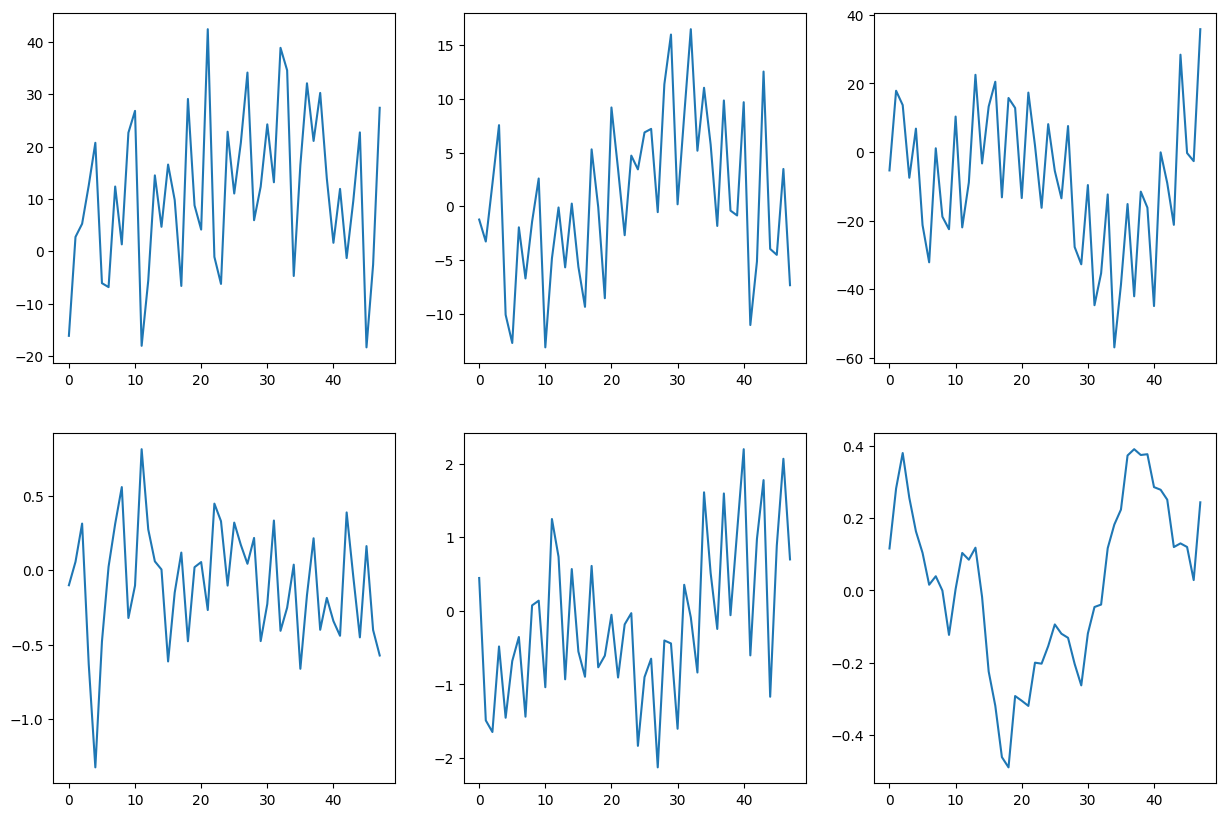

In [2]:
path = '/fastdata/sd-data/fler_guide_imu/imu/motorcycle-26009.npy'
imu_data = np.load(path)
print(imu_data.shape)

# Plot the 6 axis data in separate subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
for i in range(6):
    axs[i//3, i%3].plot(imu_data[:, i])
plt.show()

In [4]:
imu_data = np.random.randn(2000, 6)

In [10]:
# Load data
inputs = {
    ModalityType.IMU: torch.tensor(imu_data, device=device).float().transpose(0, 1).unsqueeze(0),
    # ModalityType.TEXT: data.load_and_transform_text(text_list, device),
    # ModalityType.VISION: data.load_and_transform_vision_data(image_paths, device),
    # ModalityType.AUDIO: data.load_and_transform_audio_data(audio_paths, device),
}

with torch.no_grad():
    embeddings = model(inputs)

imu_embeddings = embeddings[ModalityType.IMU]



In [3]:
from imagebind.imu.imu_encoder import IMUEncoderQuick, process_imu_data

imu_data = np.random.randn(2000, 6)
imu_encoder = IMUEncoderQuick()
imu_encoder.forward(process_imu_data(imu_data))

tensor([[ 0.0811,  0.1343,  0.0187,  ...,  0.0327, -0.2088, -0.1715]],
       device='cuda:0')

In [3]:
imu_data.tolist()

[[-16.132850646972656,
  -1.2358300685882568,
  -5.355263710021973,
  -0.10120011121034622,
  0.4463457763195038,
  0.1161138117313385],
 [2.750704765319824,
  -3.283724546432495,
  17.873062133789062,
  0.055983029305934906,
  -1.4891035556793213,
  0.28224968910217285],
 [5.258444309234619,
  2.091717481613159,
  13.694314956665039,
  0.3119184672832489,
  -1.646672010421753,
  0.38043534755706787],
 [12.5618257522583,
  7.562045097351074,
  -7.488870143890381,
  -0.6301605701446533,
  -0.48419666290283203,
  0.2563207447528839],
 [20.7169189453125,
  -10.110342025756836,
  6.8286566734313965,
  -1.3218344449996948,
  -1.4529976844787598,
  0.16355209052562714],
 [-6.081713676452637,
  -12.737228393554688,
  -21.282949447631836,
  -0.4779186248779297,
  -0.6821094751358032,
  0.10398796200752258],
 [-6.832635402679443,
  -1.9598395824432373,
  -32.1402473449707,
  0.022982504218816757,
  -0.35563957691192627,
  0.015684321522712708],
 [12.369823455810547,
  -6.724603176116943,
  1.09